# Multivariate Support Vector Regression 

Import Library

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import math
import seaborn as sns

Read Dataset

In [2]:
dataset_multivariate = pd.read_csv('dataset_mancanegara_kualanamu.csv', index_col='BulanTahun')
dataset_multivariate.head()

,TingkatHunianHotel(%),Events,Inflasi,USDToRupiah,DataAktual
BulanTahun,,,,,
January 2011,42.57,0,0.89,9048.0,12172
February 2011,44.49,0,0.13,8821.5,14270
March 2011,44.81,0,-0.32,8707.5,15600
April 2011,43.31,0,-0.31,8564.0,14998
May 2011,44.52,0,0.12,8535.5,16648


In [3]:
# Normalization using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# Features
features_to_norm = ['TingkatHunianHotel(%)','Events','Inflasi','USDToRupiah','DataAktual']
dataset_multivariate[features_to_norm] = scaler.fit_transform(dataset_multivariate[features_to_norm])
dataset_multivariate.columns = ['X1', 'X2', 'X3', 'X4', 'y']
features = ['X1', 'X2', 'X3', 'X4']
target = ['y']
X = dataset_multivariate[features]
y = dataset_multivariate[target]

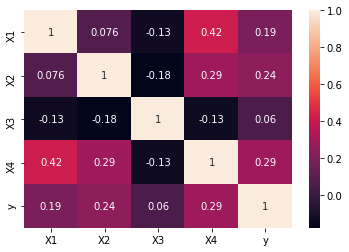

In [4]:
heat_map = sns.heatmap(dataset_multivariate.corr(), annot=True)

### Change The Splitting Data (80:20/90:10)

In [5]:
split_dataset = int(0.8*len(X))
X_train, X_test = X[:split_dataset], X[split_dataset:]
y_train, y_test = y[:split_dataset], y[split_dataset:]

In [6]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(86, 4) (22, 4)
(86, 1) (22, 1)


# Data Train

## Step I

In [7]:
# Initialization
C = 50
cLR = 0.01
epsilon = 0.001
_lambda = 0.1
sigma = 1
# 3 5 10 15 20 30 40 50
iteration = 50

## Step II

### Calculation of Distance Data Train
#### Formula: (xi-xj)^2

In [8]:
def calculate_distance_train(data_train):
    df_distance = [[] for i in range(len(data_train.index))]
    # i,j for index row data train
    # k for index column data train
    for i in range(len(data_train.index)):  
        for j in range(len(data_train.index)):        
            sum_row = 0
            distance = 0
            for k in range(len(data_train.columns)):         
                distance = pow((data_train.values[i,k]-data_train.values[j,k]),2)
                sum_row = sum_row + distance
            df_distance[j].append(sum_row)
    df_distance = pd.DataFrame(df_distance)
    return df_distance

In [9]:
df_distance_train = calculate_distance_train(X_train)
df_distance_train

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,0.000000,0.048181,0.115072,0.109016,0.054161,0.015571,0.019348,0.115208,0.033155,0.073782,...,0.427069,0.412559,0.587453,1.483657,1.476887,1.543030,0.481192,1.841173,0.449527,0.539021
1,0.048181,0.000000,0.014926,0.017487,0.001829,0.014689,0.023553,0.212637,0.021176,0.010477,...,0.456478,0.475337,0.547602,1.458019,1.487804,1.513157,0.503798,1.821404,0.488197,0.572126
2,0.115072,0.014926,0.000000,0.003972,0.014630,0.056084,0.071084,0.287837,0.048501,0.011430,...,0.511636,0.549942,0.583365,1.482805,1.528365,1.541681,0.549728,1.883990,0.555755,0.619162
3,0.109016,0.017487,0.003972,0.000000,0.015519,0.053253,0.073203,0.239297,0.034015,0.005382,...,0.539494,0.576843,0.651179,1.515567,1.551095,1.587561,0.569947,1.980474,0.596518,0.631799
4,0.054161,0.001829,0.014630,0.015519,0.000000,0.014064,0.022013,0.212899,0.023138,0.012527,...,0.516051,0.535414,0.606169,1.517113,1.549032,1.574924,0.565874,1.883203,0.548683,0.637128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1.543030,1.513157,1.541681,1.587561,1.574924,1.592680,1.609463,1.888622,1.573901,1.529603,...,1.029729,1.053708,1.044630,0.011506,0.036974,0.000000,1.047723,0.224650,1.027976,1.085856
82,0.481192,0.503798,0.549728,0.569947,0.565874,0.559941,0.593464,0.684493,0.500985,0.494216,...,0.009551,0.023377,0.171455,1.018617,1.000959,1.047723,0.000000,1.438341,0.047608,0.006938
83,1.841173,1.821404,1.883990,1.980474,1.883203,1.882667,1.846198,2.470656,1.990543,1.930254,...,1.333642,1.331720,1.073652,0.331200,0.414325,0.224650,1.438341,0.000000,1.214647,1.545786
84,0.449527,0.488197,0.555755,0.596518,0.548683,0.527749,0.535979,0.770160,0.529051,0.522595,...,0.015580,0.013182,0.063059,1.039475,1.043775,1.027976,0.047608,1.214647,0.000000,0.086023


### Calculation of Kernel
#### Formula: exp(-(perhitungan jarak)/(2*(sigma^2))

In [10]:
def calculate_kernel(data):
    # i, j index for data
    df_kernel = [[] for i in range(len(data.index))]
    for i in range(len(data.index)):
        for j in range(len(data.columns)):
            kernel = math.exp(-(data.values[i,j])/(2*pow(sigma,2)))
            df_kernel[i].append(kernel)
    df_kernel = pd.DataFrame(df_kernel)       
    return df_kernel    

In [11]:
df_kernel_train = calculate_kernel(df_distance_train)
df_kernel_train

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,1.000000,0.976197,0.944088,0.946951,0.973283,0.992245,0.990373,0.944024,0.983559,0.963781,...,0.807724,0.813606,0.745480,0.476242,0.477857,0.462312,0.786159,0.398285,0.798705,0.763753
1,0.976197,1.000000,0.992565,0.991295,0.999086,0.992682,0.988292,0.899138,0.989468,0.994775,...,0.795934,0.788464,0.760483,0.482387,0.475256,0.469269,0.777323,0.402242,0.783410,0.751215
2,0.944088,0.992565,1.000000,0.998016,0.992711,0.972347,0.965082,0.865958,0.976041,0.994301,...,0.774283,0.759594,0.747006,0.476445,0.465714,0.462624,0.759676,0.389849,0.757390,0.733754
3,0.946951,0.991295,0.998016,1.000000,0.992271,0.973725,0.964060,0.887232,0.983136,0.997313,...,0.763573,0.749446,0.722101,0.468704,0.460452,0.452132,0.752034,0.371489,0.742109,0.729133
4,0.973283,0.999086,0.992711,0.992271,1.000000,0.992993,0.989054,0.899021,0.988498,0.993756,...,0.772575,0.765132,0.738537,0.468342,0.460927,0.454998,0.753567,0.390003,0.760072,0.727192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.462312,0.469269,0.462624,0.452132,0.454998,0.450976,0.447208,0.388947,0.455231,0.465426,...,0.597582,0.590459,0.593146,0.994263,0.981683,1.000000,0.592229,0.893754,0.598106,0.581044
82,0.786159,0.777323,0.759676,0.752034,0.753567,0.755806,0.743243,0.710173,0.778417,0.781056,...,0.995236,0.988380,0.917844,0.600911,0.606240,0.592229,1.000000,0.487156,0.976477,0.996537
83,0.398285,0.402242,0.389849,0.371489,0.390003,0.390107,0.397286,0.290739,0.369623,0.380935,...,0.513338,0.513831,0.584601,0.847385,0.812888,0.893754,0.487156,1.000000,0.544807,0.461675
84,0.798705,0.783410,0.757390,0.742109,0.760072,0.768070,0.764916,0.680396,0.767570,0.770052,...,0.992240,0.993431,0.968962,0.594676,0.593400,0.598106,0.976477,0.544807,1.000000,0.957900


### Calculation of Matriks Hessian
#### Formula: K(xi,xj) + 𝝺^2

In [12]:
def calculate_hessian(data):
    # i, j index for data
    df_hessian = [[] for i in range(len(data.index))]
    for i in range(len(data.index)):
        for j in range(len(data.columns)):
            hessian = data.values[i,j] + pow(_lambda,2)
            df_hessian[i].append(hessian)
    df_hessian = pd.DataFrame(df_hessian)       
    return df_hessian

In [13]:
df_hessian_train = calculate_hessian(df_kernel_train)
df_hessian_train

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,1.010000,0.986197,0.954088,0.956951,0.983283,1.002245,1.000373,0.954024,0.993559,0.973781,...,0.817724,0.823606,0.755480,0.486242,0.487857,0.472312,0.796159,0.408285,0.808705,0.773753
1,0.986197,1.010000,1.002565,1.001295,1.009086,1.002682,0.998292,0.909138,0.999468,1.004775,...,0.805934,0.798464,0.770483,0.492387,0.485256,0.479269,0.787323,0.412242,0.793410,0.761215
2,0.954088,1.002565,1.010000,1.008016,1.002711,0.982347,0.975082,0.875958,0.986041,1.004301,...,0.784283,0.769594,0.757006,0.486445,0.475714,0.472624,0.769676,0.399849,0.767390,0.743754
3,0.956951,1.001295,1.008016,1.010000,1.002271,0.983725,0.974060,0.897232,0.993136,1.007313,...,0.773573,0.759446,0.732101,0.478704,0.470452,0.462132,0.762034,0.381489,0.752109,0.739133
4,0.983283,1.009086,1.002711,1.002271,1.010000,1.002993,0.999054,0.909021,0.998498,1.003756,...,0.782575,0.775132,0.748537,0.478342,0.470927,0.464998,0.763567,0.400003,0.770072,0.737192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.472312,0.479269,0.472624,0.462132,0.464998,0.460976,0.457208,0.398947,0.465231,0.475426,...,0.607582,0.600459,0.603146,1.004263,0.991683,1.010000,0.602229,0.903754,0.608106,0.591044
82,0.796159,0.787323,0.769676,0.762034,0.763567,0.765806,0.753243,0.720173,0.788417,0.791056,...,1.005236,0.998380,0.927844,0.610911,0.616240,0.602229,1.010000,0.497156,0.986477,1.006537
83,0.408285,0.412242,0.399849,0.381489,0.400003,0.400107,0.407286,0.300739,0.379623,0.390935,...,0.523338,0.523831,0.594601,0.857385,0.822888,0.903754,0.497156,1.010000,0.554807,0.471675
84,0.808705,0.793410,0.767390,0.752109,0.770072,0.778070,0.774916,0.690396,0.777570,0.780052,...,1.002240,1.003431,0.978962,0.604676,0.603400,0.608106,0.986477,0.554807,1.010000,0.967900


### Calculation of Value 𝝲
#### Formula: cLR/max(matrix hessian)

In [14]:
gamma = round(cLR/max(df_hessian_train.max()),3)
print(gamma)

0.01


## Step III - Step IV

In [15]:
# Initialization Multipliers Lagrange
## Alpha Star = 0 and Alpha = 0
def init_alpha(data):    
    # i for index row data
    alpha = 0
    list_alpha = []
    for i in range(len(data.index)):    
        list_alpha.append(alpha)
    df = pd.DataFrame(list_alpha, columns=['alpha'])    
    return df

def init_alpha_star(data):   
    # i for index row data
    alpha_star = 0
    list_alpha_star = []
    for i in range(len(data.index)):    
        list_alpha_star.append(alpha_star)
    df = pd.DataFrame(list_alpha_star, columns=['alpha_star'])    
    return df

def alpha_star_min_alpha(data_alpha_star, data_alpha):
    # i, j for index data alpha star
    # k, l for index data alpha 
    k = 0
    l = 0
    list_alpha_star_min_alpha = []
    for i in range(len(data_alpha_star.index)):
        for j in range(len(data_alpha_star.columns)):
            sub = data_alpha_star.values[i,j] - data_alpha.values[k,l]
        k = k + 1
        list_alpha_star_min_alpha.append(sub)
    df = pd.DataFrame(list_alpha_star_min_alpha, columns=['alpha_star_min_alpha'])     
    return df


# Calculation of Error
# Formula: E = yi - 𝝨(𝝰i*-𝝰i) * Rij
def multipliers_cross_hessian(data_multipliers,data_hessian):
    # i, j for index data multipliers
    # k, l for index data hessian
    df = [[] for i in range(len(data_multipliers.index))]
    for k in range(len(data_hessian.index)):
        sum_cross = 0
        for i in range(len(data_multipliers.index)):
            l = i
            for j in range(len(data_multipliers.columns)):
                cross = data_multipliers.values[i,j] * data_hessian.values[k,l]
                sum_cross = sum_cross + cross
        df[k].append(sum_cross)
    df = pd.DataFrame(df, columns=['multiplies_cross_hessian'])    
    return df

def y_min_multipliers_cross_hessian(data_y, data_multipliers_cross_hessian):
    # i, j for index data y
    # k, l for index data multipliers cross hessian
    k = 0
    l = 0
    list_error = []
    for i in range(len(data_y.index)):
        for j in range(len(data_y.columns)):
            sub = data_y.values[i,j] - data_multipliers_cross_hessian.values[k,l]
        k = k + 1
        list_error.append(sub)
    df = pd.DataFrame(list_error, columns=['error'])     
    return df


# Delta Lagrange Multipliers
## Fromula
## 𝝳𝝰i_star = min{max(𝝲(Ei-𝝴), -𝝰i_star), C-𝝰i_star}
## 𝝳𝝰i = min{max(𝝲(-Ei-𝝴), -𝝰i), C-𝝰i}
### Delta Alpha Star
# convert to dataframe
# episilon to dataframe
def epsilon_to_df(data_train,epsilon_value):
    list_epsilon = []
    for i in range(len(data_train.index)):
        list_epsilon.append(epsilon_value)
    df = pd.DataFrame(list_epsilon, columns=['epsilon'])    
    return df

# gamma to dataframe
def gamma_to_df(data_train,gamma_value):
    list_gamma = []
    for i in range(len(data_train.index)):
        list_gamma.append(gamma_value)
    df = pd.DataFrame(list_gamma, columns=['gamma'])    
    return df

# C to dataframe
def c_to_df(data_train,c_value):
    list_c = []
    for i in range(len(data_train.index)):
        list_c.append(c_value)
    df = pd.DataFrame(list_c, columns=['C'])    
    return df

def error_min_epsilon(data_error, data_epsilon):
    # i, j for index data error
    # k, l for index data epsilon
    k = 0
    l = 0
    list_error_min_epsilon = []
    for i in range(len(data_error.index)):
        for j in range(len(data_error.columns)):
            sub = data_error.values[i,j] - data_epsilon.values[k,l]
        k = k + 1
        list_error_min_epsilon.append(sub)
    df = pd.DataFrame(list_error_min_epsilon, columns=['error_min_epsilon'])     
    return df

def gamma_cross_error_min_epsilon(data_gamma, data_error_min_epsilon):
    # i, j for index data gamma
    # k, l for index data error min epsilon
    k = 0
    l = 0
    list_gamma_cross_error_min_epsilon = []
    for i in range(len(data_gamma.index)):
        for j in range(len(data_gamma.columns)):
            cross = data_gamma.values[i,j] * data_error_min_epsilon.values[k,l]
        k = k + 1
        list_gamma_cross_error_min_epsilon.append(cross)
    df = pd.DataFrame(list_gamma_cross_error_min_epsilon, columns=['gamma_cross_error_min_epsilon'])     
    return df

def c_min_alpha_star(data_c, data_alpha_star):
    # i, j for index data c
    # k, l for index data alpha star
    k = 0
    l = 0
    list_c_min_alpha_star = []
    for i in range(len(data_c.index)):
        for j in range(len(data_c.columns)):
            sub = data_c.values[i,j] - data_alpha_star.values[k,l]
        k = k + 1
        list_c_min_alpha_star.append(sub)
    df = pd.DataFrame(list_c_min_alpha_star, columns=['C_min_alpha_star'])     
    return df

def convert_to_minus(data):
    df = data.apply(lambda x:x*-1)
    return df
# max function for multipliers
## data maximum for alpha star
def data_maximum_alpha_star(data_1, data_2):
    # i, j for index data 1
    # k, l for index data 2
    k = 0
    l = 0
    list_max = []
    for i in range(len(data_1.index)):
        for j in range(len(data_1.columns)):  
            if(data_1.values[i,j] > data_2.values[k,l]):
                maximum_value = data_1.values[i,j]
            else:
                maximum_value = data_2.values[k,l]            
        k = k + 1
        list_max.append(maximum_value)
    df = pd.DataFrame(list_max, columns=['max_delta_alpha_star'])     
    return df

## data maximum for alpha
def data_maximum_alpha(data_1, data_2):
    # i, j for index data 1
    # k, l for index data 2
    k = 0
    l = 0
    list_max = []
    for i in range(len(data_1.index)):
        for j in range(len(data_1.columns)):  
            if(data_1.values[i,j] > data_2.values[k,l]):
                maximum_value = data_1.values[i,j]
            else:
                maximum_value = data_2.values[k,l]            
        k = k + 1
        list_max.append(maximum_value)
    df = pd.DataFrame(list_max, columns=['max_delta_alpha'])     
    return df

# min function for multipliers
## data minimum for alpha star
def data_minimum_alpha_star(data_1, data_2):
    # i, j for index data 1
    # k, l for index data 2
    k = 0
    l = 0
    list_min = []
    for i in range(len(data_1.index)):
        for j in range(len(data_1.columns)):  
            if(data_1.values[i,j] < data_2.values[k,l]):
                minimum_value = data_1.values[i,j]
            else:
                minimum_value = data_2.values[k,l]            
        k = k + 1
        list_min.append(minimum_value)
    df = pd.DataFrame(list_min, columns=['delta_alpha_star'])     
    return df

## data minimum for alpha
def data_minimum_alpha(data_1, data_2):
    # i, j for index data 1
    # k, l for index data 2
    k = 0
    l = 0
    list_min = []
    for i in range(len(data_1.index)):
        for j in range(len(data_1.columns)):  
            if(data_1.values[i,j] < data_2.values[k,l]):
                minimum_value = data_1.values[i,j]
            else:
                minimum_value = data_2.values[k,l]            
        k = k + 1
        list_min.append(minimum_value)
    df = pd.DataFrame(list_min, columns=['delta_alpha'])     
    return df

### Delta Alpha Star
def c_min_alpha(data_c, data_alpha):
    # i, j for index data c
    # k, l for index data alpha
    k = 0
    l = 0
    list_c_min_alpha = []
    for i in range(len(data_c.index)):
        for j in range(len(data_c.columns)):
            sub = data_c.values[i,j] - data_alpha.values[k,l]
        k = k + 1
        list_c_min_alpha.append(sub)
    df = pd.DataFrame(list_c_min_alpha, columns=['C_min_alpha'])     
    return df

def min_error_min_epsilon(data_min_error, data_epsilon):
    # i, j for index data min error
    # k, l for index data epsilon
    k = 0
    l = 0
    list_min_error_min_epsilon = []
    for i in range(len(data_min_error.index)):
        for j in range(len(data_min_error.columns)):
            sub = data_min_error.values[i,j] - data_epsilon.values[k,l]
        k = k + 1
        list_min_error_min_epsilon.append(sub)
    df = pd.DataFrame(list_min_error_min_epsilon, columns=['min_error_min_epsilon'])     
    return df

def gamma_cross_min_error_min_epsilon(data_gamma, data_min_error_min_epsilon):
    # i, j for index data gamma
    # k, l for index data min error min epsilon
    k = 0
    l = 0
    list_gamma_cross_min_error_min_epsilon = []
    for i in range(len(data_gamma.index)):
        for j in range(len(data_gamma.columns)):
            cross = data_gamma.values[i,j] * data_min_error_min_epsilon.values[k,l]
        k = k + 1
        list_gamma_cross_min_error_min_epsilon.append(cross)
    df = pd.DataFrame(list_gamma_cross_min_error_min_epsilon, columns=['gamma_cross_min_error_min_epsilon'])     
    return df

# New Lagrange Multipliers
## Formula:
## 𝝰i* (updated) = 𝝳𝝰i* + 𝝰i*
## 𝝰i (updated) = 𝝳𝝰i + 𝝰i
def update_alpha_star(data_delta_alpha_star, data_alpha_star):
    # i, j for index data delta alpha star
    # k, l for index data alpha star
    k = 0
    l = 0
    list_update_alpha_star = []
    for i in range(len(data_delta_alpha_star.index)):
        for j in range(len(data_delta_alpha_star.columns)):
            update = data_delta_alpha_star.values[i,j] + data_alpha_star.values[k,l]
        k = k + 1
        list_update_alpha_star.append(update)
    df = pd.DataFrame(list_update_alpha_star, columns=['update_alpha_star'])     
    return df

def update_alpha(data_delta_alpha, data_alpha):
    # i, j for index data delta alpha
    # k, l for index data alpha
    k = 0
    l = 0
    list_update_alpha = []
    for i in range(len(data_delta_alpha.index)):
        for j in range(len(data_delta_alpha.columns)):
            update = data_delta_alpha.values[i,j] + data_alpha.values[k,l]
        k = k + 1
        list_update_alpha.append(update)
    df = pd.DataFrame(list_update_alpha, columns=['update_alpha'])     
    return df

## Iteration (Learning)

In [16]:
for i in range(iteration):
    print("\nIterasi ", i+1)
    data_train = y_train
    data_hessian = df_hessian_train
    
    if i == 0:
        df_alpha = init_alpha(data_train)
        df_alpha_star = init_alpha_star(data_train)
    elif i > 0:
        df_alpha = df_update_alpha
        df_alpha_star = df_update_alpha_star
    
    df_multipliers = alpha_star_min_alpha(df_alpha_star, df_alpha)
    df_multipliers_cross_hessian = multipliers_cross_hessian(df_multipliers, data_hessian)
    df_error = y_min_multipliers_cross_hessian(data_train, df_multipliers_cross_hessian)
    
    df_epsilon = epsilon_to_df(data_train, epsilon)
    df_gamma = gamma_to_df(data_train, gamma)
    df_c = c_to_df(data_train, C)
    
    df_error_min_epsilon = error_min_epsilon(df_error, df_epsilon)
    df_gamma_cross_error_min_epsilon = gamma_cross_error_min_epsilon(df_gamma, df_error_min_epsilon)
    df_c_min_alpha_star = c_min_alpha_star(df_c, df_alpha_star)
    df_minus_alpha_star = convert_to_minus(df_alpha_star)
    df_max_alpha_star = data_maximum_alpha_star(df_gamma_cross_error_min_epsilon, df_minus_alpha_star)
    df_delta_alpha_star = data_minimum_alpha_star(df_max_alpha_star, df_c_min_alpha_star)
    
    df_minus_error = convert_to_minus(df_error)
    df_minus_alpha = convert_to_minus(df_alpha)
    df_c_min_alpha = c_min_alpha(df_c, df_alpha)
    df_min_error_min_epsilon = min_error_min_epsilon(df_minus_error, df_epsilon)
    df_gamma_cross_min_error_min_epsilon = gamma_cross_min_error_min_epsilon(df_gamma, df_min_error_min_epsilon)
    df_max_alpha = data_maximum_alpha(df_gamma_cross_min_error_min_epsilon, df_minus_alpha)
    df_delta_alpha = data_minimum_alpha(df_max_alpha, df_c_min_alpha)
    
    df_update_alpha = update_alpha(df_delta_alpha, df_alpha)
    df_update_alpha_star = update_alpha_star(df_delta_alpha_star, df_alpha_star)
    
    concat_df_train_iteration = [df_error, df_delta_alpha_star, df_delta_alpha, df_update_alpha_star, df_update_alpha]    
    df_train_iteration = pd.concat(concat_df_train_iteration, axis=1)
    print(df_train_iteration)    
    
    # Check condition
    ## max(abs(delta_alpha_star) < epsilon and max(abs(delta_alpha) < epsilon ==> Stop Iteration
    abs_delta_alpha_star = abs(df_delta_alpha_star)
    abs_delta_alpha = abs(df_delta_alpha)
    maximum_delta_alpha_star = (abs_delta_alpha_star.max()).max()
    maximum_delta_alpha = (abs_delta_alpha.max()).max()         
    if ((maximum_delta_alpha_star < epsilon and maximum_delta_alpha < epsilon) and i < iteration):        
        print("\nStop Iteration")
        break
    elif ((maximum_delta_alpha_star < epsilon or maximum_delta_alpha < epsilon) and i < iteration):        
        print("\nNext Iteration to ", i + 2)        


Iterasi  1
       error  delta_alpha_star  delta_alpha  update_alpha_star  update_alpha
0   0.109169          0.001082            0           0.001082             0
1   0.218651          0.002177            0           0.002177             0
2   0.288055          0.002871            0           0.002871             0
3   0.256640          0.002556            0           0.002556             0
4   0.342744          0.003417            0           0.003417             0
..       ...               ...          ...                ...           ...
81  0.556176          0.005552            0           0.005552             0
82  0.692793          0.006918            0           0.006918             0
83  0.831550          0.008306            0           0.008306             0
84  0.290977          0.002900            0           0.002900             0
85  0.399729          0.003987            0           0.003987             0

[86 rows x 5 columns]

Next Iteration to  2

Iterasi  2
       

       error  delta_alpha_star  delta_alpha  update_alpha_star  update_alpha
0  -0.262580         -0.000000     0.002616           0.000000      0.024937
1  -0.147681         -0.000000     0.001467           0.000000      0.013676
2  -0.066742         -0.000000     0.000657           0.000000      0.005891
3  -0.090816         -0.000000     0.000898           0.000000      0.008312
4  -0.014708         -0.000157     0.000137           0.002715      0.001162
..       ...               ...          ...                ...           ...
81  0.154750          0.001537    -0.000000           0.027064      0.000000
82  0.276651          0.002757    -0.000000           0.037024      0.000000
83  0.456991          0.004560    -0.000000           0.059951      0.000000
84 -0.140291         -0.000000     0.001393           0.000000      0.011026
85 -0.005829         -0.000068     0.000048           0.005764      0.000096

[86 rows x 5 columns]

Iterasi  12
       error  delta_alpha_star  delta_al

       error  delta_alpha_star  delta_alpha  update_alpha_star  update_alpha
0  -0.255498         -0.000000     0.002545           0.000000      0.050684
1  -0.135754         -0.000000     0.001348           0.000000      0.027664
2  -0.051950         -0.000000     0.000509           0.000000      0.011624
3  -0.074631         -0.000000     0.000736           0.000000      0.016370
4  -0.001805         -0.000028     0.000008           0.001884      0.001793
..       ...               ...          ...                ...           ...
81  0.099477          0.000985    -0.000000           0.039038      0.000000
82  0.274005          0.002730    -0.000000           0.064362      0.000000
83  0.399607          0.003986    -0.000000           0.102049      0.000000
84 -0.147961         -0.000000     0.001470           0.000000      0.025473
85 -0.008074         -0.000091     0.000071           0.004878      0.000783

[86 rows x 5 columns]

Iterasi  22
       error  delta_alpha_star  delta_al

       error  delta_alpha_star  delta_alpha  update_alpha_star  update_alpha
0  -0.252852         -0.000000     0.002519           0.000000      0.075944
1  -0.128586         -0.000000     0.001276           0.000000      0.040697
2  -0.042134         -0.000000     0.000411           0.000000      0.016129
3  -0.063942         -0.000000     0.000629           0.000000      0.023092
4   0.005881          0.000049    -0.000069           0.002077      0.001400
..       ...               ...          ...                ...           ...
81  0.076288          0.000753    -0.000000           0.047477      0.000000
82  0.275075          0.002741    -0.000000           0.091727      0.000000
83  0.372909          0.003719    -0.000000           0.140308      0.000000
84 -0.150956         -0.000000     0.001500           0.000000      0.040335
85 -0.006691         -0.000077     0.000057           0.004052      0.001408

[86 rows x 5 columns]

Iterasi  32
       error  delta_alpha_star  delta_al

       error  delta_alpha_star  delta_alpha  update_alpha_star  update_alpha
0  -0.252356         -0.000000     0.002514           0.000000      0.101085
1  -0.124128         -0.000000     0.001231           0.000000      0.053188
2  -0.035352         -0.000000     0.000344           0.000000      0.019845
3  -0.056542         -0.000000     0.000555           0.000000      0.028953
4   0.010652          0.000097    -0.000117           0.002851      0.000427
..       ...               ...          ...                ...           ...
81  0.065829          0.000648    -0.000000           0.054339      0.000000
82  0.277236          0.002762    -0.000000           0.119253      0.000000
83  0.359055          0.003581    -0.000000           0.176647      0.000000
84 -0.152077         -0.000000     0.001511           0.000000      0.055396
85 -0.004304         -0.000053     0.000033           0.003415      0.001845

[86 rows x 5 columns]

Iterasi  42
       error  delta_alpha_star  delta_al

In [17]:
# to get the last df from iteration
df_train_iteration

,error,delta_alpha_star,delta_alpha,update_alpha_star,update_alpha
0,-0.252691,-0.000000,0.002517,0.000000,0.123727
1,-0.121377,-0.000000,0.001204,0.000000,0.064133
2,-0.030768,-0.000000,0.000298,0.000000,0.022706
3,-0.051468,-0.000000,0.000505,0.000000,0.033697
4,0.013619,0.000126,-0.000000,0.003867,0.000000
...,...,...,...,...,...
81,0.062926,0.000619,-0.000000,0.060001,0.000000
82,0.279145,0.002781,-0.000000,0.144209,0.000000
83,0.352965,0.003520,-0.000000,0.208541,0.000000
84,-0.152743,-0.000000,0.001517,0.000000,0.069029


In [18]:
df_updated_alpha_star = df_train_iteration[['update_alpha_star']]
df_updated_alpha  = df_train_iteration[['update_alpha']]

## Step V

#### Regression function or y_pred
#### f(x) = 𝝨(𝝰i_star-𝝰i)(K(xi,xj)+(𝝺^2)) or f(x) = 𝝨(𝝰i_star-𝝰i)Rij

In [19]:
df_updated_multipliers = alpha_star_min_alpha(df_updated_alpha_star, df_updated_alpha)
df_updated_multipliers

,alpha_star_min_alpha
0,-0.123727
1,-0.064133
2,-0.022706
3,-0.033697
4,0.003867
...,...
81,0.060001
82,0.144209
83,0.208541
84,-0.069029


In [20]:
def regression_function(data_updated_multipliers, data_hessian):
    # i, j for index data updated multipliers
    # k, l for index data hessian
    df = [[] for i in range(len(data_hessian.index))]
    for k in range(len(data_hessian.index)):
        sum_cross = 0
        for i in range(len(data_updated_multipliers.index)):
            l = i
            for j in range(len(data_updated_multipliers.columns)):
                cross = data_updated_multipliers.values[i,j] * data_hessian.values[k,l]
                sum_cross = sum_cross + cross
        df[k].append(sum_cross)
    df = pd.DataFrame(df, columns=['f(x)'])    
    return df

In [21]:
df_regression_function_train = regression_function(df_updated_multipliers, df_hessian_train)
df_regression_function_train

,f(x)
0,0.361982
1,0.339833
2,0.318436
3,0.307666
4,0.328905
...,...
81,0.493441
82,0.413538
83,0.479127
84,0.443884


## Step VI

### Denormalized y and  f(X)
#### Formula: yi = Xn * (Xmax-Xmin) + Xmin

In [22]:
df_multivarite = pd.read_csv('dataset_mancanegara_kualanamu.csv', index_col='BulanTahun')
y_actual = df_multivarite[['DataAktual']]
y_actual

,DataAktual
BulanTahun,
January 2011,12172
February 2011,14270
March 2011,15600
April 2011,14998
May 2011,16648
...,...
August 2019,24623
September 2019,18913
October 2019,21518


In [23]:
# Denormalized function
## Denormalized y
def denormalized_y_actual(data_to_denormalized, data_actual):
    # i, j for index data to denormalized
    list_data_to_denorm = []
    data_min_actual = min(data_actual.min())
    data_max_actual = max(data_actual.max())
    for i in range(len(data_to_denormalized.index)):
        for j in range(len(data_to_denormalized.columns)):
            data_denorm = data_to_denormalized.values[i,j] * (data_max_actual - data_min_actual) + data_min_actual
        list_data_to_denorm.append(data_denorm)
    df = pd.DataFrame(list_data_to_denorm, columns=['dernomalized_y'])    
    return df

## Denormalized prediction
def denormalized_y_pred(data_to_denormalized, data_actual):
    # i, j for index data to denormalized
    list_data_to_denorm = []
    data_min_actual = min(data_actual.min())
    data_max_actual = max(data_actual.max())
    for i in range(len(data_to_denormalized.index)):
        for j in range(len(data_to_denormalized.columns)):
            data_denorm = data_to_denormalized.values[i,j] * (data_max_actual - data_min_actual) + data_min_actual
        list_data_to_denorm.append(data_denorm)
    df = pd.DataFrame(list_data_to_denorm, columns=['dernomalized_f(x)'])    
    return df

In [24]:
df_denormalized_y_train = denormalized_y_actual(y_train, y_actual)
df_denormalized_y_train

,dernomalized_y
0,12172.0
1,14270.0
2,15600.0
3,14998.0
4,16648.0
...,...
81,20738.0
82,23356.0
83,26015.0
84,15656.0


In [25]:
df_denormalized_y_pred_train = denormalized_y_pred(df_regression_function_train, y_actual)
df_denormalized_y_pred_train

,dernomalized_f(x)
0,17016.659399
1,16592.221166
2,16182.186069
3,15975.806290
4,16382.807029
...,...
81,19535.808173
82,18004.637337
83,19261.506866
84,18586.153533


### MAPE Train
#### Formula: 1/n * 𝝨(|(yi-yi')/yi|) * 100%

In [26]:
def calculate_mape(data_1, data_2):
    # data_1 is denormalized y
    # data_2 is denormalized y_pred
    # i, j for index data 1
    # k, l for index data 2
    count_row = len(data_1) # also same to len(data_2)
    sum_data = 0
    k = 0
    l = 0
    for i in range(len(data_1.index)):
        for j in range(len(data_1.columns)):
            sub_abs = (1/count_row) * abs((data_1.values[i,j] - data_2.values[k,l]) / data_1.values[i,j])
            sum_data = sum_data + sub_abs
        k = k + 1
    mape = round(sum_data*100, 2)
    return mape    

In [27]:
mape_train = calculate_mape(df_denormalized_y_train, df_denormalized_y_pred_train)

# Data Test

### Calculation of Distance between Data Train and Data Test

In [28]:
def calcute_distance_test(data_test, data_train):
    # i, j for index data test
    # k, l for index data train
    df = [[] for i in range(len(data_test.index))]
    for i in range(len(data_test.index)):
        for k in range(len(data_train.index)):
            sum_row = 0
            distance = 0
            for j in range(len(data_test.columns)):
                l = j
                distance = pow((data_test.values[i,j] - data_train.values[k,l]),2)
                sum_row = sum_row + distance
            df[i].append(sum_row)
    df = pd.DataFrame(df)       
    return df            

In [29]:
df_distance_test = calcute_distance_test(X_test, X_train)
df_distance_test

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,0.553275,0.550580,0.593105,0.636500,0.615267,0.619289,0.636307,0.882856,0.599482,0.568956,...,0.017967,0.033471,0.057313,1.014114,1.027706,1.004370,0.034683,1.235745,0.015777,0.067145
1,0.583585,0.578214,0.616170,0.655413,0.644740,0.652127,0.675553,0.887898,0.616896,0.585969,...,0.017458,0.036799,0.083996,1.009965,1.017683,1.008756,0.023242,1.288615,0.027688,0.047099
2,0.556831,0.575685,0.622705,0.651953,0.642340,0.638328,0.667587,0.805844,0.589058,0.574688,...,0.010067,0.023916,0.134328,1.015530,1.005550,1.029638,0.006225,1.370007,0.034496,0.018211
3,0.632090,0.690640,0.763320,0.799480,0.763284,0.737358,0.757838,0.914995,0.708113,0.708736,...,0.025785,0.023611,0.132769,1.053102,1.036811,1.050726,0.034466,1.318581,0.027898,0.049857
4,0.680950,0.700436,0.752580,0.794667,0.773685,0.769011,0.791189,0.995087,0.735894,0.713742,...,0.031231,0.042727,0.102882,1.035196,1.034652,1.027206,0.037124,1.289968,0.034307,0.056624
5,1.869509,1.917726,1.960454,1.956974,1.995411,1.987411,2.054723,1.924689,1.846257,1.856062,...,1.177541,1.199282,1.512929,0.187690,0.122460,0.261439,1.108594,0.910267,1.278275,1.061871
6,1.845632,1.831596,1.858521,1.895272,1.910500,1.928875,1.967842,2.122822,1.855409,1.815942,...,1.079016,1.109411,1.190774,0.057608,0.053797,0.065474,1.056136,0.440871,1.112374,1.057297
7,1.891450,1.957729,2.020328,2.037022,2.041549,2.020858,2.070015,2.053938,1.922152,1.930242,...,1.118350,1.127241,1.361935,0.139431,0.088619,0.175056,1.077238,0.661128,1.174643,1.050004
8,0.741079,0.727172,0.772889,0.838554,0.798424,0.806250,0.808748,1.188250,0.820369,0.772052,...,0.092582,0.106478,0.026387,1.081732,1.118779,1.033995,0.131199,1.118996,0.051918,0.183086
9,1.641082,1.705370,1.780564,1.815457,1.778725,1.750123,1.771493,1.916351,1.718652,1.722453,...,1.028702,1.025106,1.145143,0.058852,0.039092,0.058247,1.035719,0.334435,1.032500,1.048766


### Calculation of Kernel

In [30]:
df_kernel_test = calculate_kernel(df_distance_test)
df_kernel_test

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,0.758329,0.759352,0.743377,0.727421,0.735185,0.733708,0.727491,0.643118,0.741010,0.752407,...,0.991057,0.983404,0.971750,0.602265,0.598186,0.605207,0.982808,0.539090,0.992143,0.966985
1,0.746923,0.748932,0.734853,0.720574,0.724430,0.721759,0.713355,0.641498,0.734586,0.746034,...,0.991309,0.981769,0.958872,0.603516,0.601192,0.603881,0.988446,0.525026,0.986251,0.976726
2,0.756982,0.749880,0.732456,0.721822,0.725300,0.726756,0.716202,0.668364,0.744882,0.750254,...,0.994979,0.988113,0.935042,0.601839,0.604850,0.597609,0.996892,0.504088,0.982900,0.990936
3,0.729027,0.707994,0.682727,0.670494,0.682739,0.691647,0.684601,0.632865,0.701835,0.701617,...,0.987190,0.988264,0.935771,0.590639,0.595469,0.591341,0.982914,0.517218,0.986148,0.975380
4,0.711432,0.704534,0.686403,0.672110,0.679198,0.680787,0.673280,0.608023,0.692154,0.699863,...,0.984506,0.978863,0.949859,0.595950,0.596112,0.598336,0.981609,0.524671,0.982993,0.972085
5,0.392682,0.383328,0.375226,0.375879,0.368725,0.370202,0.357950,0.381996,0.397274,0.395331,...,0.555009,0.549009,0.469323,0.910424,0.940607,0.877464,0.574476,0.634363,0.527747,0.588055
6,0.397398,0.400197,0.394846,0.387656,0.384716,0.381198,0.373842,0.345967,0.395460,0.403342,...,0.583035,0.574241,0.551349,0.971607,0.973460,0.967793,0.589743,0.802170,0.573391,0.589401
7,0.388398,0.375738,0.364159,0.361132,0.360316,0.364063,0.355224,0.358091,0.382481,0.380937,...,0.571681,0.569145,0.506127,0.932659,0.956658,0.916193,0.583554,0.718518,0.555814,0.591554
8,0.690362,0.695179,0.679469,0.657522,0.670849,0.668229,0.667394,0.552045,0.663528,0.679753,...,0.954764,0.948153,0.986893,0.582244,0.571558,0.596308,0.936506,0.571496,0.974375,0.912522
9,0.440194,0.426269,0.410540,0.403440,0.410918,0.416836,0.412406,0.383592,0.423447,0.422643,...,0.597889,0.598964,0.564073,0.971003,0.980644,0.971297,0.595794,0.846016,0.596754,0.591921


### Calculation of Matrix Hessian 

In [31]:
df_hessian_test = calculate_hessian(df_kernel_test)
df_hessian_test

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,0.768329,0.769352,0.753377,0.737421,0.745185,0.743708,0.737491,0.653118,0.751010,0.762407,...,1.001057,0.993404,0.981750,0.612265,0.608186,0.615207,0.992808,0.549090,1.002143,0.976985
1,0.756923,0.758932,0.744853,0.730574,0.734430,0.731759,0.723355,0.651498,0.744586,0.756034,...,1.001309,0.991769,0.968872,0.613516,0.611192,0.613881,0.998446,0.535026,0.996251,0.986726
2,0.766982,0.759880,0.742456,0.731822,0.735300,0.736756,0.726202,0.678364,0.754882,0.760254,...,1.004979,0.998113,0.945042,0.611839,0.614850,0.607609,1.006892,0.514088,0.992900,1.000936
3,0.739027,0.717994,0.692727,0.680494,0.692739,0.701647,0.694601,0.642865,0.711835,0.711617,...,0.997190,0.998264,0.945771,0.600639,0.605469,0.601341,0.992914,0.527218,0.996148,0.985380
4,0.721432,0.714534,0.696403,0.682110,0.689198,0.690787,0.683280,0.618023,0.702154,0.709863,...,0.994506,0.988863,0.959859,0.605950,0.606112,0.608336,0.991609,0.534671,0.992993,0.982085
5,0.402682,0.393328,0.385226,0.385879,0.378725,0.380202,0.367950,0.391996,0.407274,0.405331,...,0.565009,0.559009,0.479323,0.920424,0.950607,0.887464,0.584476,0.644363,0.537747,0.598055
6,0.407398,0.410197,0.404846,0.397656,0.394716,0.391198,0.383842,0.355967,0.405460,0.413342,...,0.593035,0.584241,0.561349,0.981607,0.983460,0.977793,0.599743,0.812170,0.583391,0.599401
7,0.398398,0.385738,0.374159,0.371132,0.370316,0.374063,0.365224,0.368091,0.392481,0.390937,...,0.581681,0.579145,0.516127,0.942659,0.966658,0.926193,0.593554,0.728518,0.565814,0.601554
8,0.700362,0.705179,0.689469,0.667522,0.680849,0.678229,0.677394,0.562045,0.673528,0.689753,...,0.964764,0.958153,0.996893,0.592244,0.581558,0.606308,0.946506,0.581496,0.984375,0.922522
9,0.450194,0.436269,0.420540,0.413440,0.420918,0.426836,0.422406,0.393592,0.433447,0.432643,...,0.607889,0.608964,0.574073,0.981003,0.990644,0.981297,0.605794,0.856016,0.606754,0.601921


### y_pred_test

In [32]:
df_regression_function_test = regression_function(df_updated_multipliers, df_hessian_test)
df_regression_function_test

,f(x)
0,0.423834
1,0.416012
2,0.416168
3,0.428100
4,0.416846
5,0.410159
6,0.447705
7,0.434296
8,0.418097
9,0.487963


### Denormalized y_test and y_pred_test

In [33]:
df_denormalized_y_test = denormalized_y_actual(y_test, y_actual)
df_denormalized_y_test

,dernomalized_y
0,21693.0
1,18538.0
2,14624.0
3,18153.0
4,22330.0
5,23753.0
6,19851.0
7,15744.0
8,21538.0
9,19966.0


In [34]:
df_denormalized_y_pred_test = denormalized_y_pred(df_regression_function_test, y_actual)
df_denormalized_y_pred_test

,dernomalized_f(x)
0,18201.926122
1,18052.034862
2,18055.026806
3,18283.682398
4,18068.028157
5,17939.871154
6,18659.371310
7,18402.419623
8,18091.992730
9,19430.841528


In [35]:
df_predict_y_test_and_y_actual = pd.concat([df_denormalized_y_test, df_denormalized_y_pred_test], axis=1)
df_predict_y_test_and_y_actual = pd.DataFrame(df_predict_y_test_and_y_actual.values, index=[y_test.index], columns=['Data Aktual', 'Prediksi'])
df_predict_y_test_and_y_actual

,Data Aktual,Prediksi
BulanTahun,,
March 2018,21693.0,18201.926122
April 2018,18538.0,18052.034862
May 2018,14624.0,18055.026806
June 2018,18153.0,18283.682398
July 2018,22330.0,18068.028157
August 2018,23753.0,17939.871154
September 2018,19851.0,18659.371310
October 2018,15744.0,18402.419623
November 2018,21538.0,18091.992730


### MAPE Test

In [36]:
mape_test = calculate_mape(df_denormalized_y_test, df_denormalized_y_pred_test)

In [37]:
print("C = " + str(C))
print("cLR = " + str(cLR))
print("epsilon = " + str(epsilon))
print("lambda = " + str(_lambda))
print("sigma = " + str(sigma))
print("iteration = " + str(iteration))
print("gamma = " + str(gamma))
print("mape train = " + str(calculate_mape(df_denormalized_y_train, df_denormalized_y_pred_train)) + "%")
print("mape test = "+ str(calculate_mape(df_denormalized_y_test, df_denormalized_y_pred_test)) + "%")

C = 50
cLR = 0.01
epsilon = 0.001
lambda = 0.1
sigma = 1
iteration = 50
gamma = 0.01
mape train = 13.38%
mape test = 12.99%
